In [105]:
from sklearn import datasets

In [106]:
import numpy as np

In [107]:
iris = datasets.load_iris()

In [108]:
X = iris.data[:,[2, 3]]
y = iris.target
print("Class labels:" , np.unique(y))

Class labels: [0 1 2]


In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size= 0.3, random_state = 1, stratify = y)

In [111]:
print("labels counts in y:" , np.bincount(y))

labels counts in y: [50 50 50]


In [112]:
print("labels counts in y_train:",  np.bincount(y_train))

labels counts in y_train: [35 35 35]


In [113]:
print("labels counts in y_test:",np.bincount(y_test ))

labels counts in y_test: [15 15 15]


In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
sc = StandardScaler()

In [116]:
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [117]:
X_train_std= sc.transform(X_train)

In [118]:
X_test_std= sc.transform(X_test)

In [119]:
from sklearn.linear_model import Perceptron

In [120]:
ppn = Perceptron(max_iter=40,eta0=0.1, random_state=0)

In [121]:
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
y_pred = ppn.predict(X_test_std)

In [123]:
print("MIsclassified samples: %d" % (y_test != y_pred).sum())

MIsclassified samples: 3


In [124]:
from sklearn.metrics import accuracy_score

In [125]:
print("Accuracy: %.2f" % ppn.score(X_test_std, y_test))

Accuracy: 0.93


In [126]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [127]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    markers = ("s", "x","o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() -1, X[:,0].max() +1
    x2_min , x2_max = X[:,1].min() -1, X[:,1].max() +1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[ y== cl,1],
                            alpha = 0.8, c = colors[idx], marker = markers[idx], 
                            label= cl, edgecolor = "black")
    
    if test_idx:
        
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:,0], X_test[:,1], c= "", edgecolors="black", alpha= 1.0, linewidth = 1,
                            marker = "o", s = 100 , label = "test set")

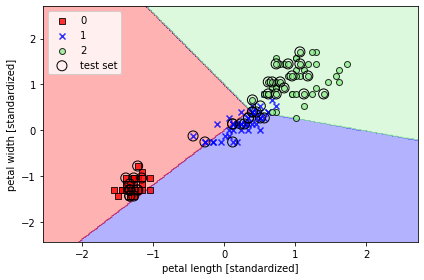

In [128]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [129]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [130]:
z = np.arange(-7, 7, 0.1)

In [131]:
phi_z = sigmoid(z)

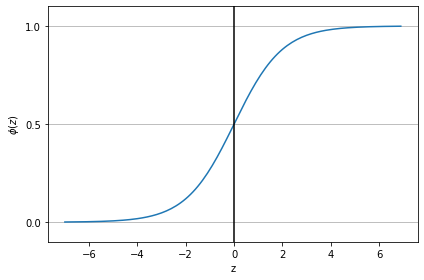

In [135]:
plt.plot(z, phi_z)
plt.axvline(0.0, color = "k")
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("$\phi (z)$")
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [147]:
def cost_1(z):
    return -np.log(sigmoid(z))

In [148]:
def cost_0(z):
    return - np.log(1- sigmoid(z))

In [149]:
z = np.arange(-10, 10, 0.1)

In [150]:
phi_z = sigmoid(z)

In [151]:
c1 = [cost_1(x) for x in z]

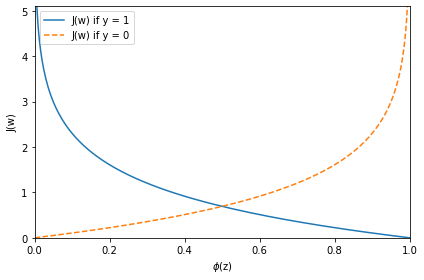

In [155]:
plt.plot(phi_z, c1,  label = "J(w) if y = 1")
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle = "--" , label = "J(w) if y = 0" )
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel("$\phi$(z)")
plt.ylabel("J(w)")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()

In [172]:
class LogisticRegressionGD(object):
    
    def __init__(self, eta0 = 0.05, max_iter = 100, random_state = 1):
        self.eta0 = eta0
        self.max_iter = max_iter
        self.random_state = random_state
    
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state) 
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ =[]
        
        for i in range(self.max_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] +=self.eta0 * X.T.dot(errors)
            self.w_[0] +=self.eta0* errors.sum()
            cost = -y.dot(np.log(output)) - ((1 - y ).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self
    
    def net_input(self, X,):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict (self,X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

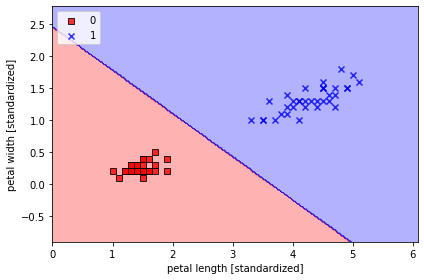

In [173]:
X_train_01_subset = X_train[(y_train == 0)  | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0)  | (y_train ==1)]
lrgd = LogisticRegressionGD(eta0 = 0.05, max_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = lrgd)
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.legend(loc = "upper left")
plt.tight_layout()
plt.show()